# Tensorflow Tutorial (MNIST with one hidden layer)
## Neural Networks (TU Graz 2018)
(Adapted from the documentation of tensorflow, find more at: www.tensorflow.org)


Improving the MNIST tutorial by adding one hidden layer

<img src="hidden_layer.png" style="width: 200px;" />

In [1]:
%matplotlib inline

Import dataset and libraries.  
Please ignore the deprecation warning while importing the MNIST dataset.

In [11]:
import tensorflow as tf
import numpy as np
import numpy.random as rd
import matplotlib.pyplot as plt

from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


Define your variables and the operations that define the tensorflow model.  
- x,y,z do have have numerical values, those are symbolic **"Tensors"**
- x is a matrix and not a vector, is has shape [None,784]. The first dimension correspond to a **batch size**. Multiplying larger matrices is usually faster that multiplying small ones many times, using minibatches allows to process many images in a single matrix multiplication.

In [3]:
# Give the dimension of the data and chose the number of hidden layer
n_in = 784
n_out = 10
n_hidden = 20

# Set the variables
W_hid = tf.Variable(rd.randn(n_in,n_hidden) / np.sqrt(n_in),trainable=True)
b_hid = tf.Variable(np.zeros(n_hidden),trainable=True)

w_out = tf.Variable(rd.randn(n_hidden,n_out) / np.sqrt(n_in),trainable=True)
b_out = tf.Variable(np.zeros(n_out))

# Define the neuron operations
x = tf.placeholder(shape=(None,784),dtype=tf.float64)
y = tf.nn.tanh(tf.matmul(x,W_hid) + b_hid)
z = tf.nn.softmax(tf.matmul(y,w_out) + b_out)

Define the loss as the cross entropy: $ - \sum y \log y'$

In [4]:
z_ = tf.placeholder(shape=(None,10),dtype=tf.float64)
cross_entropy = tf.reduce_mean(-tf.reduce_sum(z_ * tf.log(z), reduction_indices=[1]))

The operation to perform gradient descent.  
Note that train_step is still a **symbolic operation**, it needs to be executed to update the variables.


In [23]:
train_step = tf.train.GradientDescentOptimizer(0.1).minimize(cross_entropy)

To evaluate the performance in a readable way, we also compute the classification accuracy.

In [8]:
correct_prediction = tf.equal(tf.argmax(z,1), tf.argmax(z_,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float64))

Open a session and initialize the variables.

In [7]:
init = tf.global_variables_initializer() # Create an op that will
sess = tf.Session()
sess.run(init) # Set the value of the variables to their initialization value

In [24]:
# Re init variables to start from scratch
sess.run(init)

# Create some list to monitor how error decreases
test_loss_list = []
train_loss_list = []

test_acc_list = []
train_acc_list = []

# Create minibtaches to train faster
k_batch = 100
X_batch_list = np.array_split(mnist.train.images,k_batch)
labels_batch_list = np.array_split(mnist.train.labels,k_batch)

for k in range(50):
    # Run gradient steps over each minibatch
    for x_minibatch,labels_minibatch in zip(X_batch_list,labels_batch_list):
        sess.run(train_step, feed_dict={x: x_minibatch, z_:labels_minibatch})
        
    # Compute the errors over the whole dataset
    train_loss = sess.run(cross_entropy, feed_dict={x:mnist.train.images, z_:mnist.train.labels})
    test_loss = sess.run(cross_entropy, feed_dict={x:mnist.test.images, z_:mnist.test.labels})
    
    # Compute the acc over the whole dataset
    train_acc = sess.run(accuracy, feed_dict={x:mnist.train.images, z_:mnist.train.labels})
    test_acc = sess.run(accuracy, feed_dict={x:mnist.test.images, z_:mnist.test.labels})
    
    # Put it into the lists
    test_loss_list.append(test_loss)
    train_loss_list.append(train_loss)
    test_acc_list.append(test_acc)
    train_acc_list.append(train_acc)
    
    if np.mod(k,10) == 0:
        print('iteration {} test accuracy: {:.3f}'.format(k+1,test_acc))

iteration 0 test accuracy: 0.760
iteration 10 test accuracy: 0.926
iteration 20 test accuracy: 0.938
iteration 30 test accuracy: 0.943
iteration 40 test accuracy: 0.947


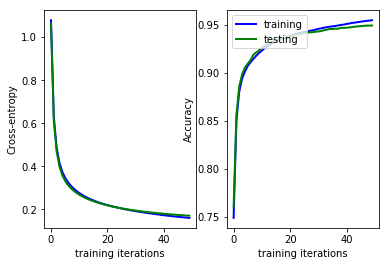

In [25]:
fig,ax_list = plt.subplots(1,2)
ax_list[0].plot(train_loss_list, color='blue', label='training', lw=2)
ax_list[0].plot(test_loss_list, color='green', label='testing', lw=2)
ax_list[1].plot(train_acc_list, color='blue', label='training', lw=2)
ax_list[1].plot(test_acc_list, color='green', label='testing', lw=2)

ax_list[0].set_xlabel('training iterations')
ax_list[1].set_xlabel('training iterations')
ax_list[0].set_ylabel('Cross-entropy')
ax_list[1].set_ylabel('Accuracy')
plt.legend(loc=2)